<a href="https://colab.research.google.com/github/SelviyaniJusbar/MachineLearning/blob/main/H071201008_Selviyani_Jusbar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Selviyani Jusbar

------

Nim : H071201008

------

UAS Machine Learning

**Metode Supervised Learning**


*   Dataset : South Korea Visitors by Gender
*   Model : Linear Regression



**Import Gdrive**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Library**

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as met
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

1. Memuat data kedalam sebuah dataframe dan loadset

In [3]:
df = pd.read_csv ("/content/drive/MyDrive/UAS ML_H071201008_Selviyani Jusbar/Enter_korea_by_gender.csv")

2. Menampilkan 5 baris pertama dari dataset

In [4]:
df.head()

,date,nation,visitor,growth,share,male,female,crewman
0,2019-1,China,392814,28.737870,35.555117,147511,231722,13581
1,2019-1,Japan,206526,23.606830,18.693468,75070,129029,2427
2,2019-1,Taiwan,87954,16.003693,7.961057,30805,56202,947
3,2019-1,Hong Kong,35896,3.533212,3.249086,12172,22729,995
4,2019-1,Macao,2570,-12.376406,0.232621,748,1787,35


3. Menampilkan jumlah kolom dan baris dari dataset

In [5]:
df.shape

(960, 8)

4. Menampilkan informasi jumlah data, type data, memory yang digunakan, dll

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     960 non-null    object 
 1   nation   960 non-null    object 
 2   visitor  960 non-null    int64  
 3   growth   960 non-null    float64
 4   share    960 non-null    float64
 5   male     960 non-null    int64  
 6   female   960 non-null    int64  
 7   crewman  960 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 60.1+ KB


5. Menampilkan deskripsi dataset

In [7]:
df.describe()

,visitor,growth,share,male,female,crewman
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,20389.154167,-7.025329,1.666667,7919.408333,11223.012500,1246.733333
std,67275.220326,37.597348,4.913962,24619.766279,41323.928744,2669.504265
min,1.000000,-99.976798,0.002128,0.000000,0.000000,0.000000
25%,890.750000,-14.043547,0.088277,459.750000,189.250000,63.750000
50%,2476.000000,4.718441,0.238153,1208.000000,711.000000,310.000000
75%,9901.750000,15.223269,0.916897,5176.500000,3758.750000,979.500000
max,578112.000000,108.054475,37.846937,216737.000000,348980.000000,25052.000000


6. Menampilkan visualisasi dari correlation dalam heatmap correlation

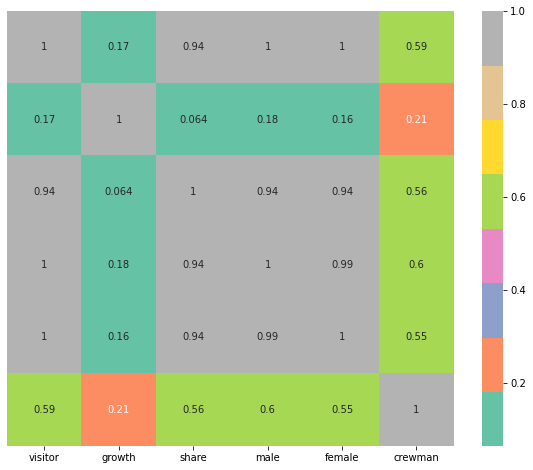

In [8]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),yticklabels=False,cmap="Set2",annot=True)



7. Null

In [9]:
df.isnull().sum()

date       0
nation     0
visitor    0
growth     0
share      0
male       0
female     0
crewman    0
dtype: int64

8. Exploratory data analsys

In [10]:
df.head()

,date,nation,visitor,growth,share,male,female,crewman
0,2019-1,China,392814,28.737870,35.555117,147511,231722,13581
1,2019-1,Japan,206526,23.606830,18.693468,75070,129029,2427
2,2019-1,Taiwan,87954,16.003693,7.961057,30805,56202,947
3,2019-1,Hong Kong,35896,3.533212,3.249086,12172,22729,995
4,2019-1,Macao,2570,-12.376406,0.232621,748,1787,35


9. Enconding categorical data 

In [11]:
le = LabelEncoder()
df["date"] = le.fit_transform(df["date"])
df["nation"] = le.fit_transform(df["nation"])

10. Menampilkan data setelah dilakukan enconding

In [12]:
df.head()

,date,nation,visitor,growth,share,male,female,crewman
0,0,12,392814,28.737870,35.555117,147511,231722,13581
1,0,27,206526,23.606830,18.693468,75070,129029,2427
2,0,52,87954,16.003693,7.961057,30805,56202,947
3,0,20,35896,3.533212,3.249086,12172,22729,995
4,0,29,2570,-12.376406,0.232621,748,1787,35


11. Membagi data menjadi variabel x dan y

In [13]:
x = df.drop("nation", axis=1)
y = df["nation"]

12. Mensplit dataset menjadi data training dan data testing

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4)

13. Menampilkan shape dari data training dan data testing

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(768, 7)
(192, 7)
(768,)
(192,)


14. Membuat model dari dataset

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

15. Membuat prediksi dari model yang telah dibuat

In [17]:
predictions = model.predict(x_test)

16. Menampilkan nilai prediksi

In [18]:
predictions[:5]

array([28.60990865, 30.24606413, 28.22577569, 27.98167143, 27.63166664])

16. Menampilkan nilai score dari model

In [19]:
model.score(x_test, y_test)

0.03170414563198376